In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm
from random import shuffle

In [2]:
pip install -q pyyaml h5py  

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.1MB/s 
     |████████████████████████████████| 137.3MB 83kB/s 
     |████████████████████████████████| 92kB 6.3MB/s 
     |████████████████████████████████| 256kB 28.7MB/s 
     |████████████████████████████████| 921kB 35.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=ab30c7fa68d6ec1d6acdc11672c3d6569b6695990017043901645b869028f4ca
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMG_SIZE = 48
LR = 1e-3

MODEL_NAME = '/content/drive/My Drive/Colab Notebooks/Faces/model/facialexp-{}-{}.model'.format(LR, 'keras-basic')

for sad [0,1]
for happy [1,0]

In [ ]:
def create_train_data():
  train_data=[]
  a=0
  for cat in os.listdir(train_dir):
    if cat=='sad': label=[0,1]
    elif cat=='happy': label=[1,0]
    path=os.path.join(train_dir,cat)
    for img in tqdm(os.listdir(os.path.join(train_dir,cat))):
      path_f=os.path.join(path,img)
      img=cv2.resize(cv2.imread(path_f,cv2.IMREAD_GRAYSCALE),(48,48))
      train_data.append([np.array(img),np.array(label)])
      if a==20:break
  shuffle(train_data)
  np.save('/content/drive/My Drive/Colab Notebooks/Faces/model/traindata.npy',train_data)
  # print(train_data[0:5])
  return train_data


In [ ]:
training_data = create_train_data()

In [7]:
training_data=np.load('/content/drive/My Drive/Colab Notebooks/Faces/model/train_and_test/traindata.npy',allow_pickle=True)
testing_data=np.load('/content/drive/My Drive/Colab Notebooks/Faces/model/train_and_test/test_data.npy',allow_pickle=True)

In [8]:
print(training_data[[1]])

[[array([[153, 144, 140, ..., 108, 100,  89],
       [148, 135, 145, ..., 110, 102,  87],
       [136, 134, 143, ..., 114, 104,  85],
       ...,
       [ 75,  90, 110, ...,  83,  69,  43],
       [ 63,  83,  99, ...,  78,  59,  31],
       [ 37,  81,  96, ...,  72,  49,  24]], dtype=uint8)
  array([1, 0])]]


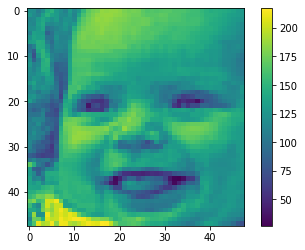

In [12]:
plt.figure()
plt.imshow(training_data[4][0])
plt.colorbar()
plt.grid(False)
plt.show()


In [13]:
print(training_data[0:10])
print(testing_data[10])
# shuffle(training_data)
# print(training_data[0:10])

[[array([[123, 113, 104, ...,  89,  87, 109],
       [113, 105, 100, ...,  92,  83, 101],
       [105, 100,  96, ...,  94,  79,  91],
       ...,
       [106,  90,  76, ..., 108,  86,  97],
       [107,  88,  74, ...,  90,  81,  91],
       [105,  91,  75, ...,  89,  84,  87]], dtype=uint8)
  array([1, 0])]
 [array([[153, 144, 140, ..., 108, 100,  89],
       [148, 135, 145, ..., 110, 102,  87],
       [136, 134, 143, ..., 114, 104,  85],
       ...,
       [ 75,  90, 110, ...,  83,  69,  43],
       [ 63,  83,  99, ...,  78,  59,  31],
       [ 37,  81,  96, ...,  72,  49,  24]], dtype=uint8)
  array([1, 0])]
 [array([[ 91, 135, 159, ...,  64, 101, 104],
       [128, 163, 166, ...,  82,  74,  99],
       [112, 151, 147, ..., 117,  89,  91],
       ...,
       [187, 172, 142, ...,  14,  17,  12],
       [156, 133, 111, ...,   8,  11,  11],
       [169, 140, 114, ...,  19,   7,   8]], dtype=uint8)
  array([1, 0])]
 [array([[63, 50, 22, ..., 71, 41, 27],
       [81, 54, 19, ..., 90, 41, 

In [14]:
class_names = ['Happy', 'Sad']


In [15]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 48
IMG_WIDTH = 48



from down here


In [16]:
train = training_data
test = testing_data

In [17]:
X=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y=[i[1] for i in train]

test_x=np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y=[i[1] for i in test]



In [18]:
print(X[0][0])
print(test_x[0][0])

[[123]
 [113]
 [104]
 [100]
 [ 95]
 [ 91]
 [ 90]
 [ 89]
 [ 83]
 [ 88]
 [ 80]
 [ 84]
 [ 87]
 [ 81]
 [ 82]
 [ 83]
 [ 78]
 [ 90]
 [100]
 [117]
 [107]
 [ 98]
 [127]
 [140]
 [139]
 [125]
 [113]
 [111]
 [115]
 [115]
 [112]
 [109]
 [104]
 [105]
 [ 98]
 [ 89]
 [ 82]
 [ 75]
 [ 76]
 [ 87]
 [102]
 [109]
 [108]
 [108]
 [ 83]
 [ 89]
 [ 87]
 [109]]
[[219]
 [230]
 [154]
 [203]
 [228]
 [226]
 [215]
 [243]
 [241]
 [169]
 [191]
 [220]
 [165]
 [214]
 [240]
 [227]
 [203]
 [201]
 [182]
 [205]
 [247]
 [231]
 [222]
 [226]
 [226]
 [219]
 [224]
 [223]
 [216]
 [211]
 [202]
 [195]
 [178]
 [171]
 [163]
 [172]
 [178]
 [151]
 [182]
 [209]
 [221]
 [183]
 [165]
 [179]
 [211]
 [243]
 [253]
 [255]]


In [19]:
training_set=X/255.0
testing_set=test_x/255.0

In [20]:
print(training_set)

[[[[0.48235294]
   [0.44313725]
   [0.40784314]
   ...
   [0.34901961]
   [0.34117647]
   [0.42745098]]

  [[0.44313725]
   [0.41176471]
   [0.39215686]
   ...
   [0.36078431]
   [0.3254902 ]
   [0.39607843]]

  [[0.41176471]
   [0.39215686]
   [0.37647059]
   ...
   [0.36862745]
   [0.30980392]
   [0.35686275]]

  ...

  [[0.41568627]
   [0.35294118]
   [0.29803922]
   ...
   [0.42352941]
   [0.3372549 ]
   [0.38039216]]

  [[0.41960784]
   [0.34509804]
   [0.29019608]
   ...
   [0.35294118]
   [0.31764706]
   [0.35686275]]

  [[0.41176471]
   [0.35686275]
   [0.29411765]
   ...
   [0.34901961]
   [0.32941176]
   [0.34117647]]]


 [[[0.6       ]
   [0.56470588]
   [0.54901961]
   ...
   [0.42352941]
   [0.39215686]
   [0.34901961]]

  [[0.58039216]
   [0.52941176]
   [0.56862745]
   ...
   [0.43137255]
   [0.4       ]
   [0.34117647]]

  [[0.53333333]
   [0.5254902 ]
   [0.56078431]
   ...
   [0.44705882]
   [0.40784314]
   [0.33333333]]

  ...

  [[0.29411765]
   [0.35294118]
   [0.4

In [21]:
#making  training labels
training_labels=[]
for arrs in Y:
  training_labels.append(arrs[0])
 


In [22]:
testing_labels=[]
for arr in test_y:
  testing_labels.append(arr[0])

In [23]:
np.array(training_labels)
training_labels

print("asdfasdfasdfasdfas")
np.array(testing_labels)
testing_labels

asdfasdfasdfasdfas


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [24]:
print(len(training_labels)
,len(testing_labels)
)

12102 2964


In [25]:
train_set=np.array(training_set)
train_labels=np.array(training_labels)

In [26]:
test_set=np.array(testing_set)
test_labels=np.array(testing_labels)

In [131]:
# print(test_set[1])
# print(test_set[1][1])
# print(test_set[1][2])
test_set[1].shape
one_test=[]
one_test.append(test_set[210])
one_test=np.array(one_test)
one_test.shape
print(one_test)
savetxt('one.csv', one_test)

[[[[0.33333333]
   [0.39215686]
   [0.38823529]
   ...
   [0.44705882]
   [0.41960784]
   [0.43137255]]

  [[0.3372549 ]
   [0.39607843]
   [0.38431373]
   ...
   [0.42352941]
   [0.42745098]
   [0.43921569]]

  [[0.35294118]
   [0.35686275]
   [0.43921569]
   ...
   [0.37254902]
   [0.43921569]
   [0.44705882]]

  ...

  [[0.27843137]
   [0.31764706]
   [0.32941176]
   ...
   [0.29803922]
   [0.27058824]
   [0.23921569]]

  [[0.24313725]
   [0.30588235]
   [0.34901961]
   ...
   [0.29803922]
   [0.23921569]
   [0.21960784]]

  [[0.25882353]
   [0.3372549 ]
   [0.34117647]
   ...
   [0.29019608]
   [0.20784314]
   [0.18823529]]]]


NameError: ignored

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 296,330
Trainable params: 296,330
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(train_set, train_labels, epochs=100)

Epoch 1/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8337
Epoch 2/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.8304
Epoch 3/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8352
Epoch 4/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8260
Epoch 5/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8361
Epoch 6/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8361
Epoch 7/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.8321
Epoch 8/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.8347
Epoch 9/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8448
Epoch 10/100
379/379 [==============================] - 1s 3ms/step - loss: 0.3467 - accura

In [49]:
model.save('/content/drive/My Drive/Colab Notebooks/Faces/model/keras_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Faces/model/keras_model/assets


In [ ]:
tfjs.converters.save_keras_model(model,"/content/drive/My Drive/Colab Notebooks/Faces/model/tensorjs")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [50]:
test_loss, test_acc = model.evaluate(test_set,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


93/93 - 0s - loss: 0.9709 - accuracy: 0.7345

Test accuracy: 0.7344804406166077


In [54]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [121]:
predictions = probability_model.predict(one_test)


In [122]:
predictions[0]


array([2.46227980e-02, 9.75377202e-01, 7.70450248e-27, 1.39200069e-26,
       1.14108676e-26, 5.19641013e-27, 8.03890631e-27, 8.25945303e-27,
       7.14403452e-27, 3.24946136e-27], dtype=float32)

In [123]:
np.argmax(predictions[0])


1

In [124]:
test_labels[0]

1

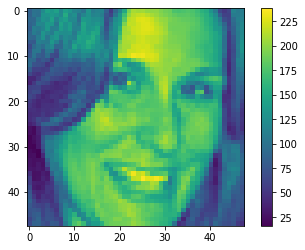

In [125]:
plt.figure()
plt.imshow(testing_data[210][0])
plt.colorbar()
plt.grid(False)
plt.show()


In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [68]:
reconstructed_model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Faces/model/keras_model")



In [69]:
test_loss, test_acc = reconstructed_model.evaluate(test_set,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


93/93 - 0s - loss: 0.9709 - accuracy: 0.3529

Test accuracy: 0.35290148854255676


In [70]:
probability_model = tf.keras.Sequential([reconstructed_model, 
                                         tf.keras.layers.Softmax()])


In [126]:
predictions = probability_model.predict(one_test)
# tensorflow.reset_default_graph()

In [127]:
np.argmax(predictions[0])


1

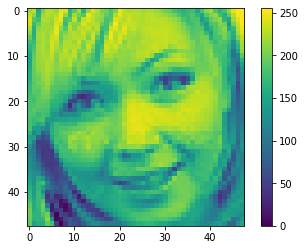

In [128]:
plt.figure()
plt.imshow(testing_data[0][0])
plt.colorbar()
plt.grid(False)
plt.show()

